In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numerik.ode import implicit_euler, implicit_midpoint, implicit_trapezoid

In [74]:
def plot_comparison(ya, title, x0, y0, x_end, f, df, h, y_min = 0, y_max = 1):
    x, y = implicit_euler(x_end, h, x0, y0, f, df)
    plt.plot(x,y,'--', label="Implicit Euler")
    
    x, y = implicit_midpoint(x_end, h, x0, y0, f, df)
    plt.plot(x,y,'--', label="Implicit Midpoint")
    
    x, y = implicit_trapezoid(x_end, h, x0, y0, f, df)
    plt.plot(x,y,'--', label="Implicit Trapezoid")
    
    x = np.linspace(x0, x_end, 100)
    y = ya(x)
    plt.plot(x, y, label="Analytical")
    
    plt.ylabel("y")
    plt.xlabel("x")
    
    x = np.linspace(x0, x_end, 10)
    y = np.linspace(y_min, y_max, 10)
    xv, yv = np.meshgrid(x, y)
    
    plt.quiver(xv, yv, np.ones_like(xv), f(xv, yv), angles="xy")
    plt.title(f"{title} (h={h:.6f})")
    plt.legend()
    plt.show()

In [75]:
def plot_error(explicit_method, ya, title, x0, y0, x_end, f, df):
    n = 10**np.linspace(2,5)
    hs = 2/n
    err = []
    for h in hs:
        x, y = explicit_method(x_end, h, x0, y0, f, df)
        err.append(np.linalg.norm(y-ya(x),np.inf))
    
    plt.title("Error")
    plt.loglog(hs,err,'-', label=title)
    plt.xlabel('h')
    plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
    plt.grid()
    plt.legend()

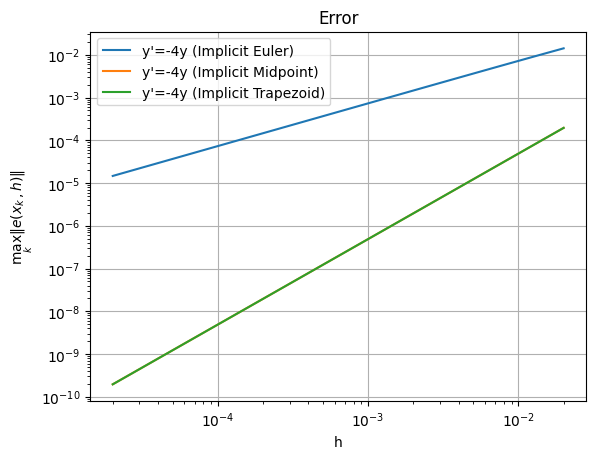

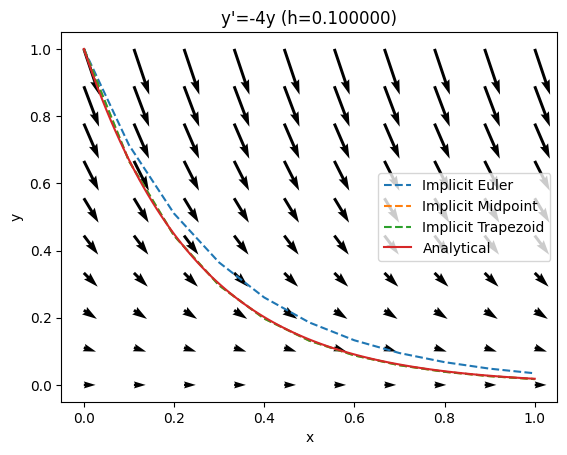

In [76]:
def plot_problem_1():
    f = lambda x, y: -4*y
    df = lambda x, y: -4
    ya = lambda x: np.exp(-4*x)

    x0 = 0
    y0 = 1
    x_end = 1

    plot_error(explicit_method=implicit_euler, ya=ya, title="y'=-4y (Implicit Euler)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plot_error(explicit_method=implicit_midpoint, ya=ya, title="y'=-4y (Implicit Midpoint)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plot_error(explicit_method=implicit_trapezoid, ya=ya, title="y'=-4y (Implicit Trapezoid)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plt.show()

    plot_comparison(ya=ya, title="y'=-4y", x0=x0, y0=y0, x_end=x_end, f=f, h=0.1, df=df)

plot_problem_1()

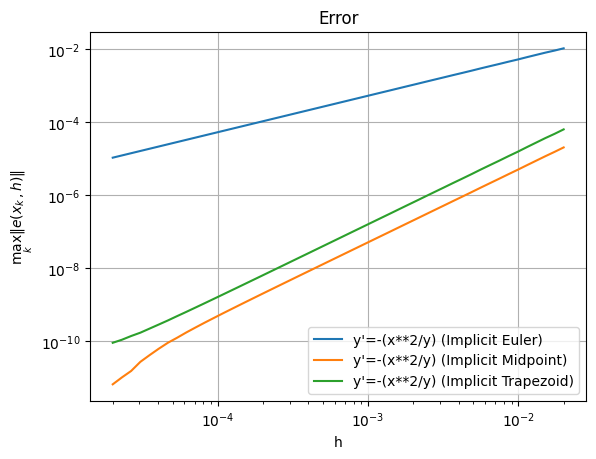

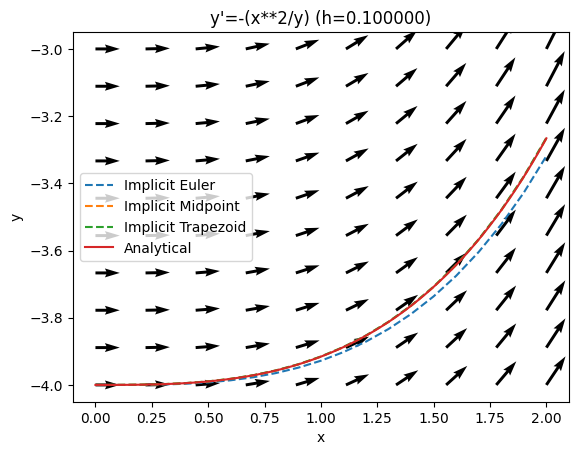

In [77]:
def plot_problem_2():
    f = lambda x, y: -(x**2/(y+1e-10))
    df = lambda x, y: -(x**2/(y**2+1e-10))
    ya = lambda x: -(2/3)**(1/2) * (24-x**3)**(1/2)

    x0 = 0
    y0 = -4
    x_end = 2

    plot_error(explicit_method=implicit_euler, ya=ya, title="y'=-(x**2/y) (Implicit Euler)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plot_error(explicit_method=implicit_midpoint, ya=ya, title="y'=-(x**2/y) (Implicit Midpoint)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plot_error(explicit_method=implicit_trapezoid, ya=ya, title="y'=-(x**2/y) (Implicit Trapezoid)", x0=x0, y0=y0, x_end=x_end, f=f, df=df)
    plt.show()

    plot_comparison(ya=ya, title="y'=-(x**2/y)", x0=x0, y0=y0, x_end=x_end, f=f, h=0.1, df=df, y_min=-4, y_max=-3)

plot_problem_2()

# Konvergenzordnungen:
# euler: 1
# midpoint: 2
# trapezoid: 2